In [2]:
import pandas as pd

file_path = "Ptichers_Adjusted_Salary.csv"
data = pd.read_csv(file_path)

print("Number of rows and columns:", data.shape)
print("\nColumn names:", data.columns)
print("\nFirst few rows of data:")
print(data.head())

print("\nMissing values:")
print(data.isnull().sum())

print("\nSummary statistics:")
print(data.describe())


Number of rows and columns: (16115, 37)

Column names: Index(['Unnamed: 0', 'yearID', 'playerID', 'salary', 'ADJ Salary', 'InnOuts',
       'PO', 'A', 'E', 'DP', 'teamID', 'lgID', 'W', 'L', 'G', 'GS', 'CG',
       'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp', 'ERA',
       'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

First few rows of data:
   Unnamed: 0  yearID   playerID  salary    ADJ Salary  InnOuts  PO   A    E  \
0           0    1985  barkele01  870000  2.092617e+06    221.0   2   9  1.0   
1           1    1985  bedrost01  550000  1.322919e+06    620.0  13  23  4.0   
2           2    1985   campri01  633333  1.523360e+06    383.0   7  13  4.0   
3           3    1985  dedmoje01  150000  3.607960e+05    258.0   9  27  2.0   
4           4    1985  forstte01  483333  1.162564e+06    178.0   2   7  1.0   

   DP  ...   IBB WP  HBP  BK    BFP  GF    R   SH   SF  GIDP  
0   0  ...   1.0  3  1.0   0  335.0   1   55  4.0  1.0 

In [3]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

print("Remaining missing values:")
print(data.isnull().sum())


Remaining missing values:
Unnamed: 0    0
yearID        0
playerID      0
salary        0
ADJ Salary    0
InnOuts       0
PO            0
A             0
E             0
DP            0
teamID        0
lgID          0
W             0
L             0
G             0
GS            0
CG            0
SHO           0
SV            0
IPouts        0
H             0
ER            0
HR            0
BB            0
SO            0
BAOpp         0
ERA           0
IBB           0
WP            0
HBP           0
BK            0
BFP           0
GF            0
R             0
SH            0
SF            0
GIDP          0
dtype: int64


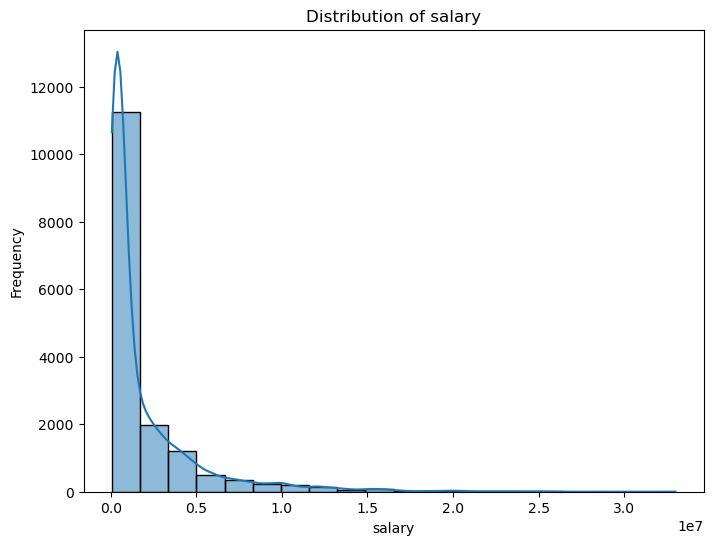

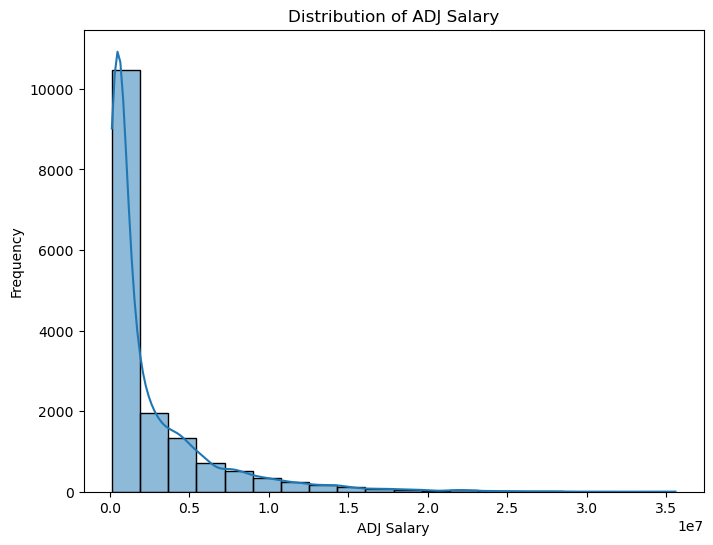

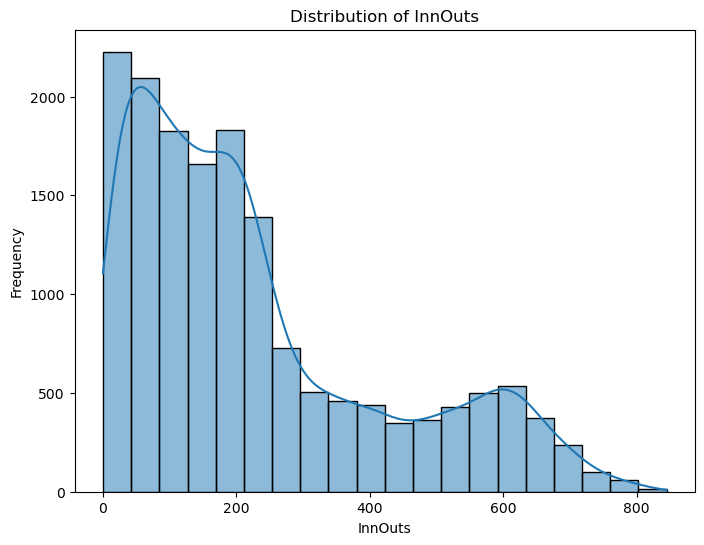

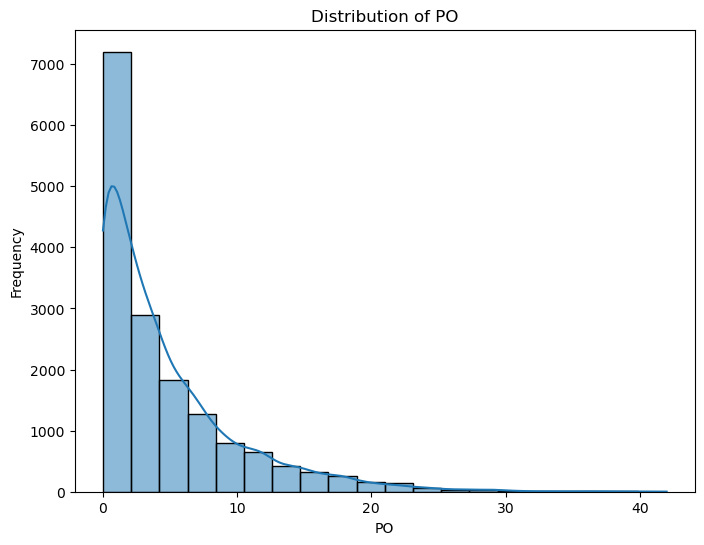

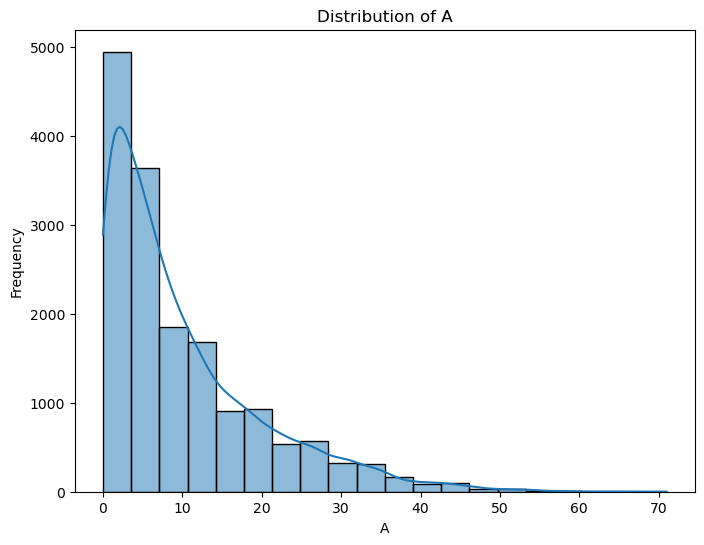

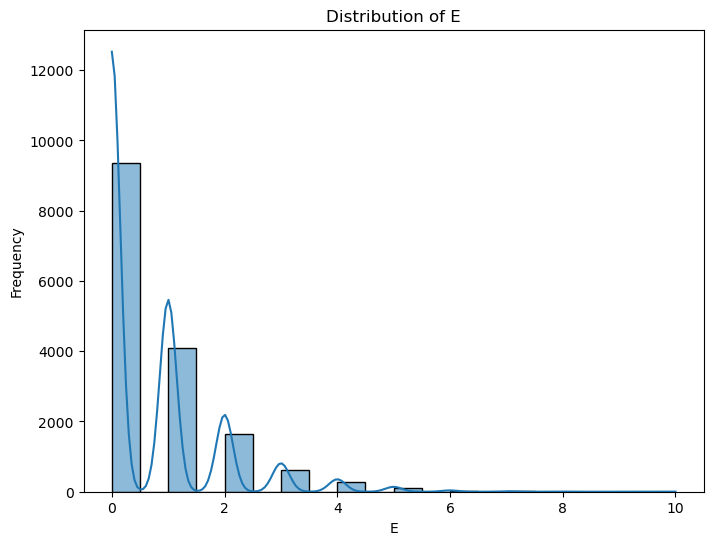

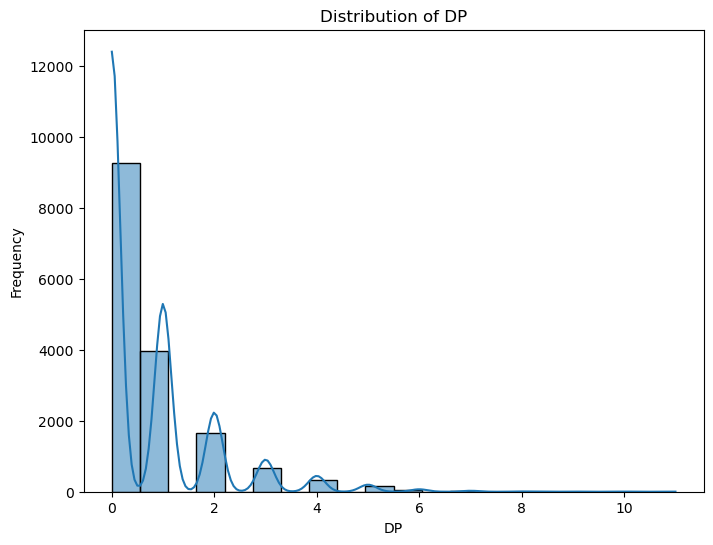

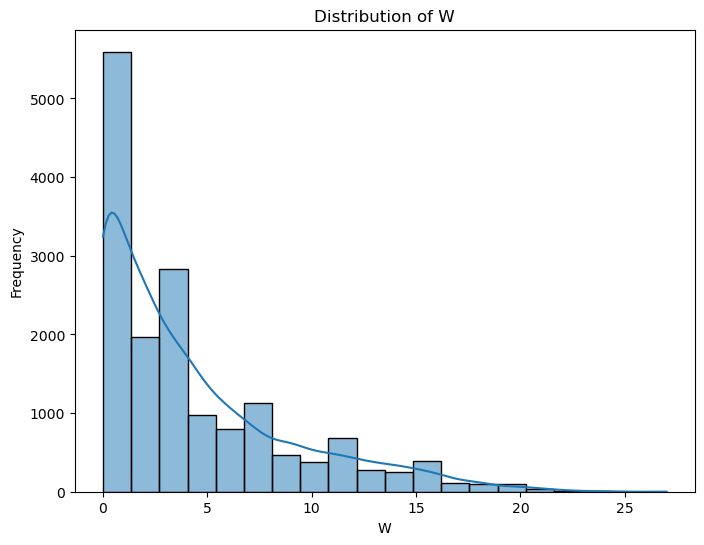

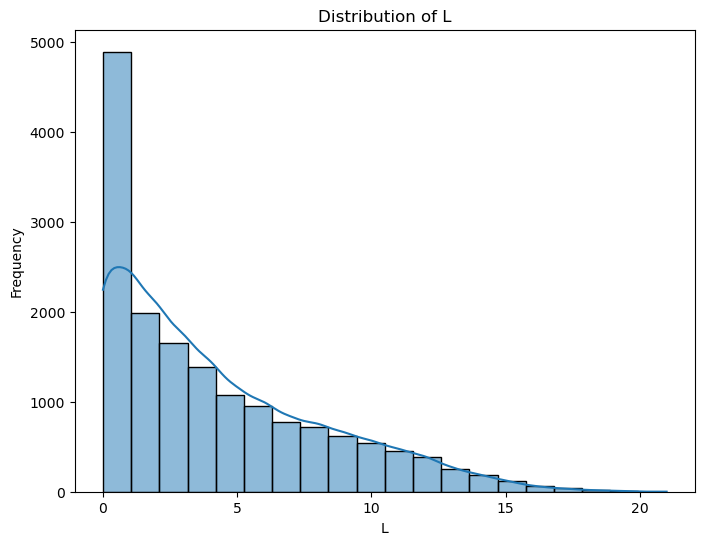

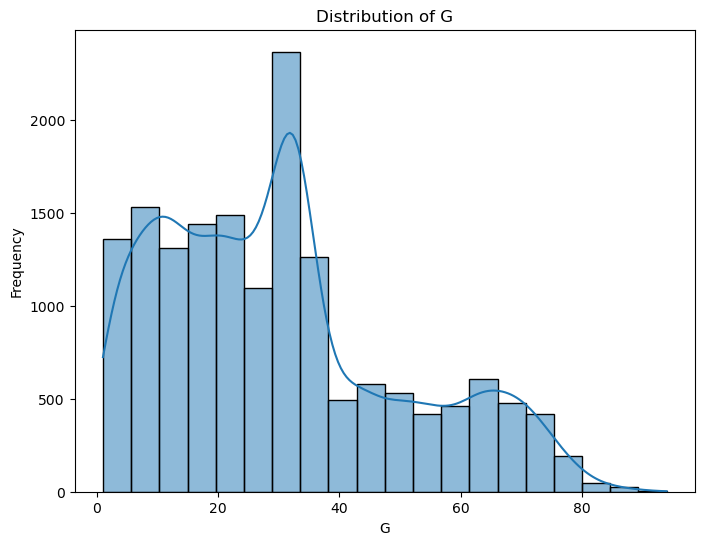

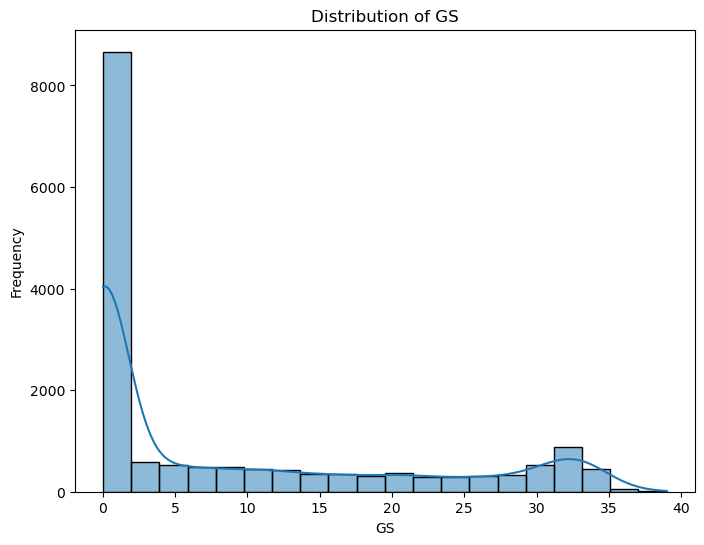

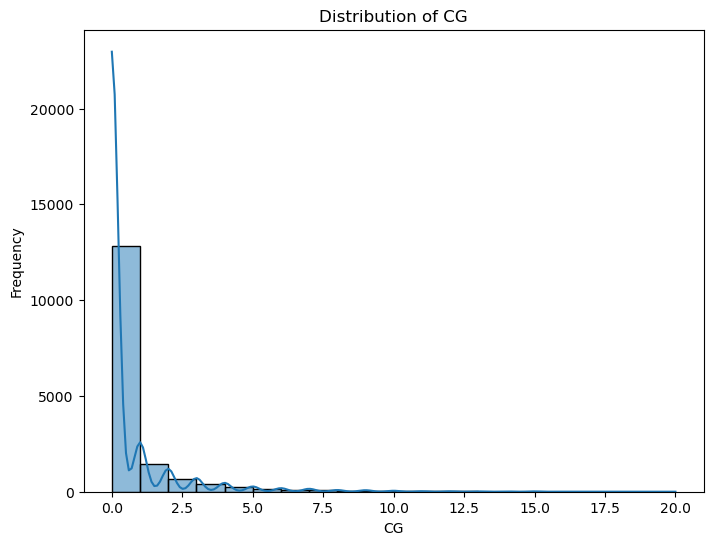

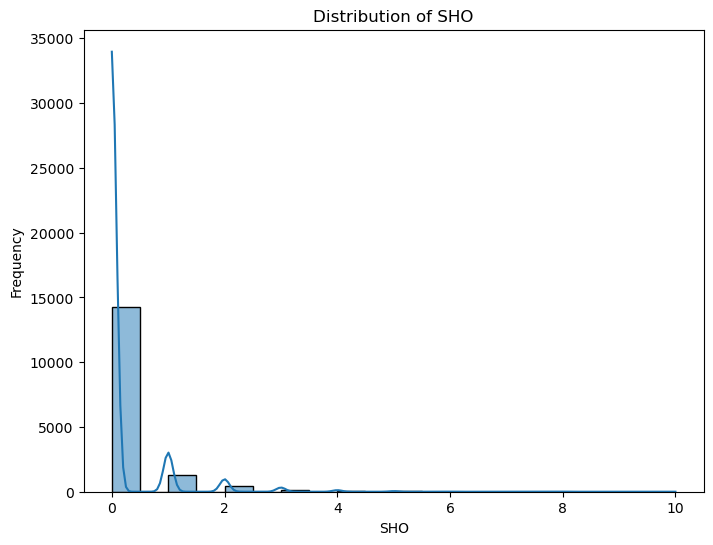

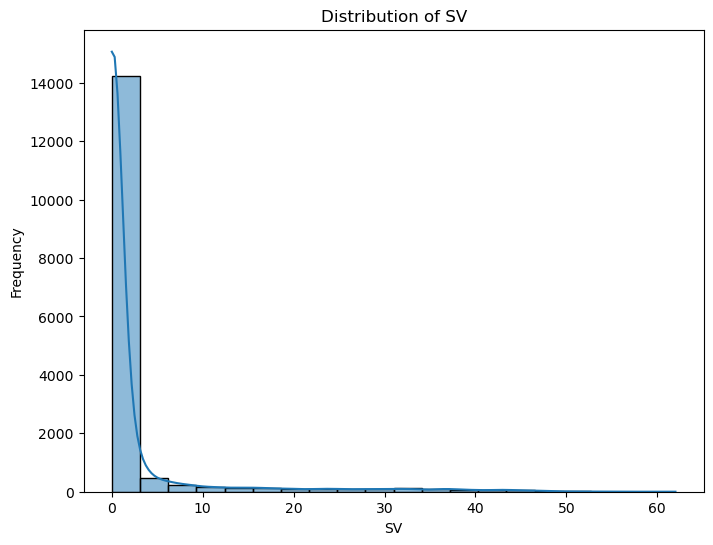

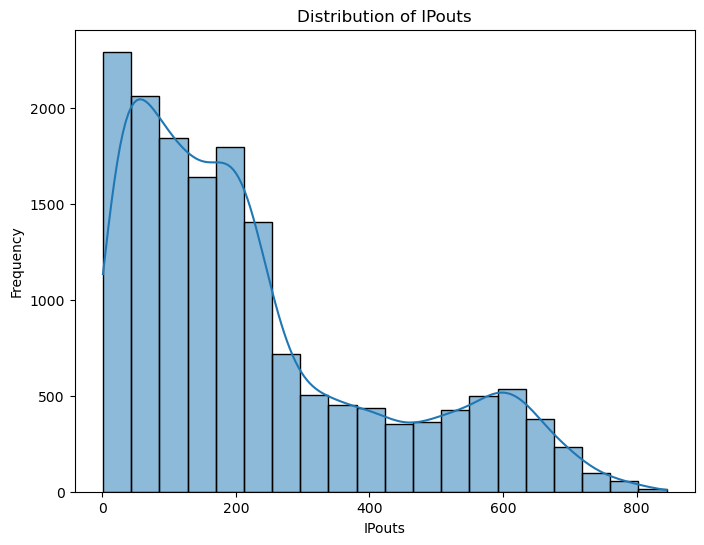

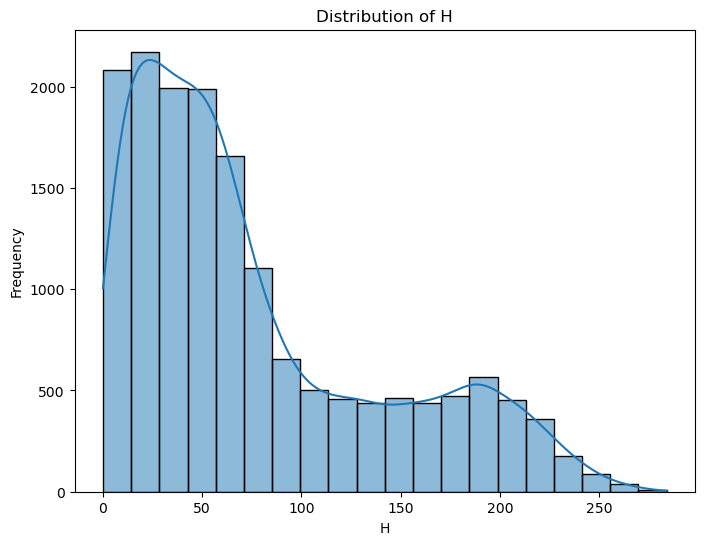

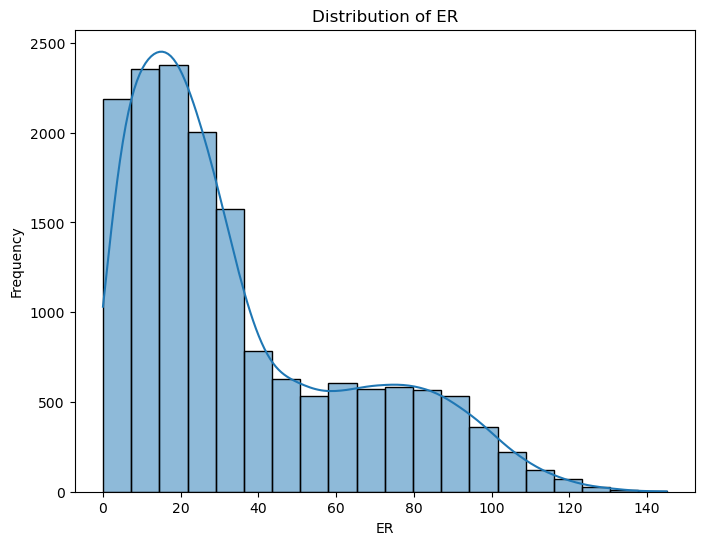

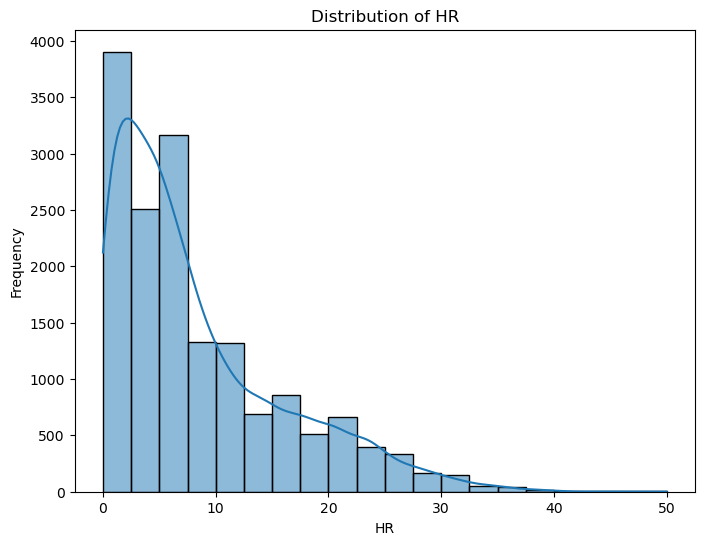

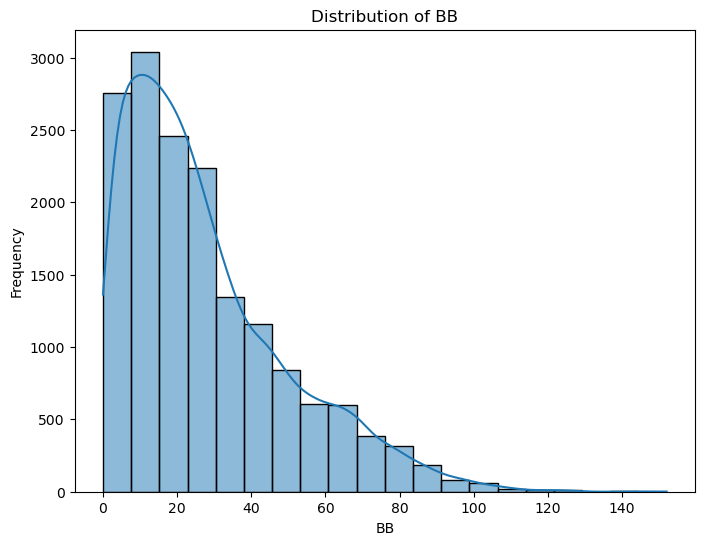

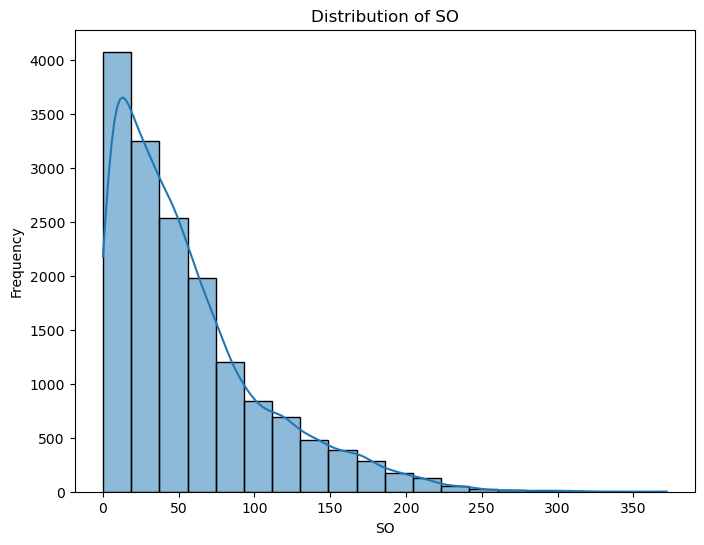

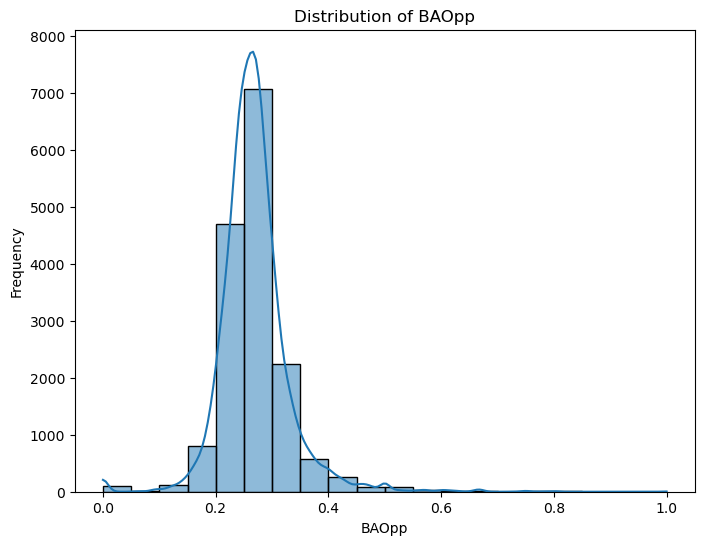

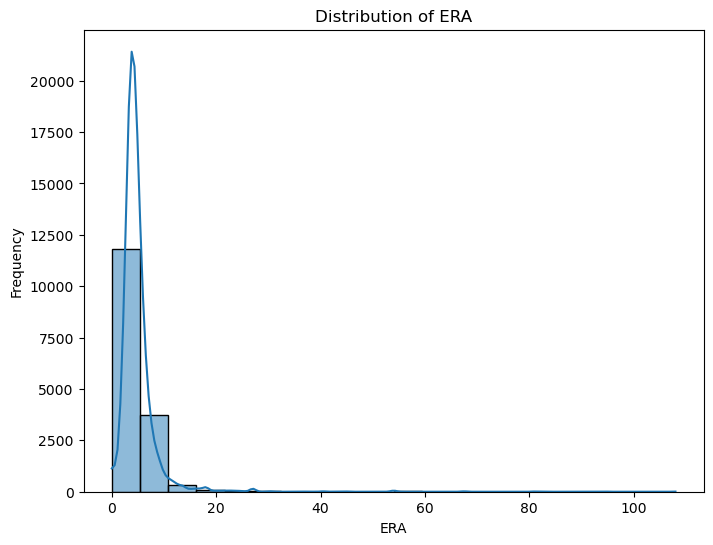

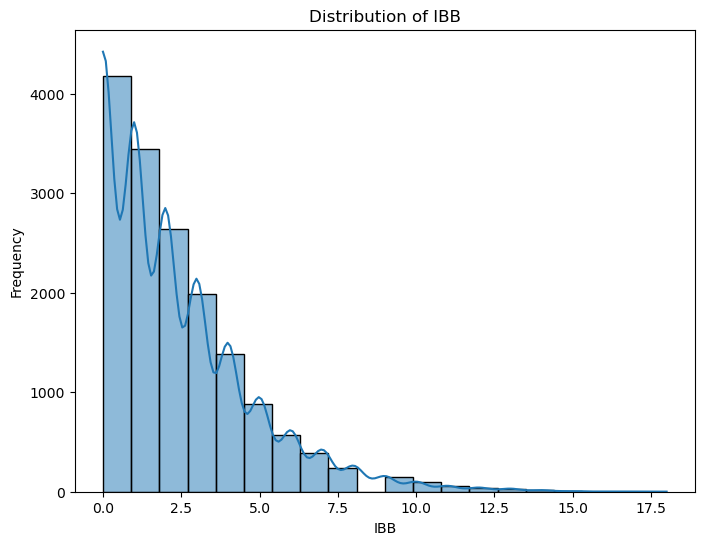

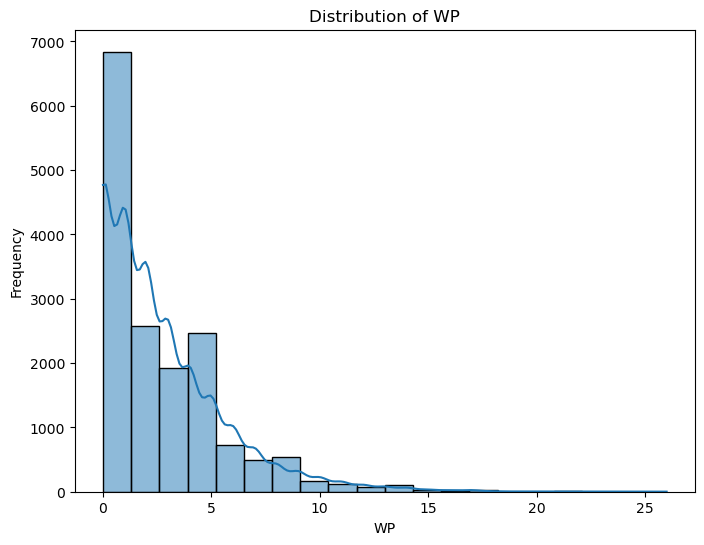

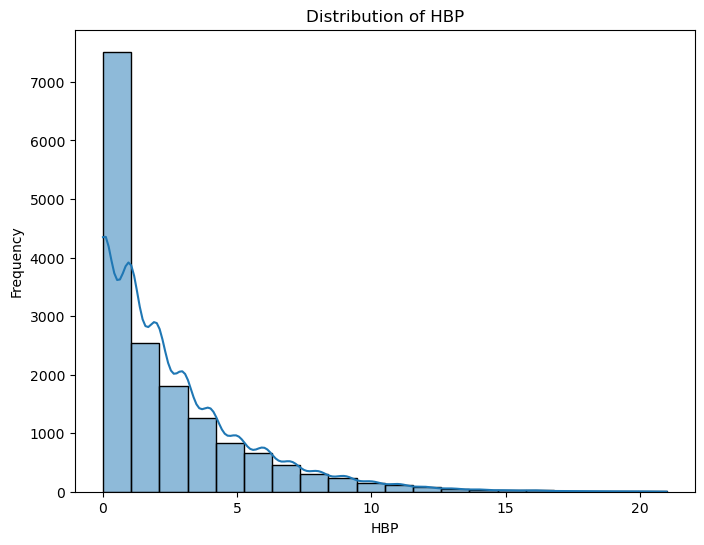

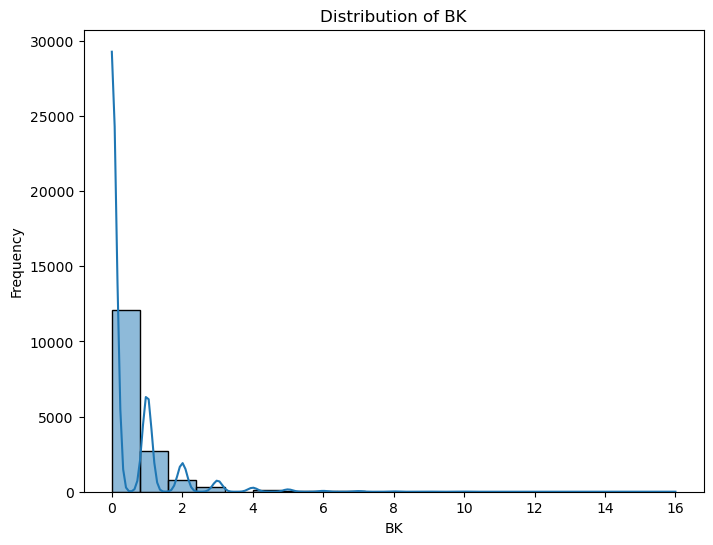

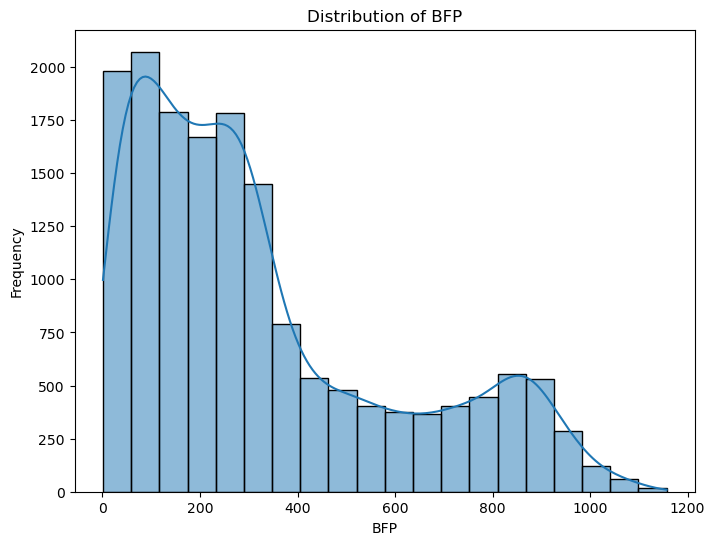

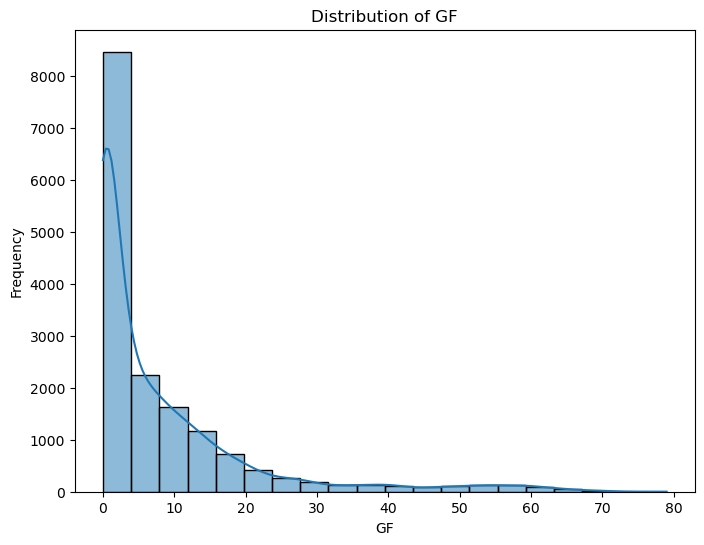

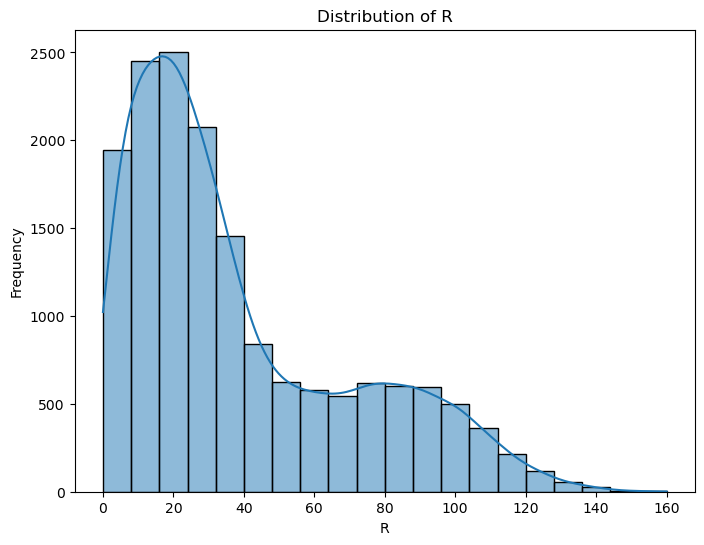

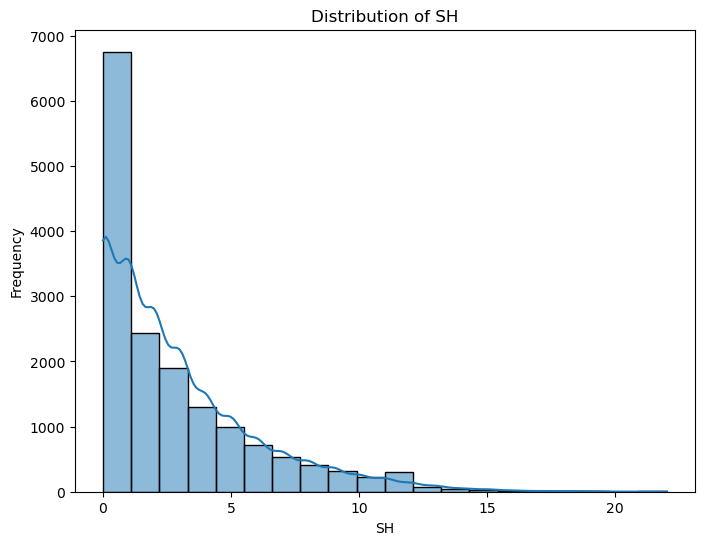

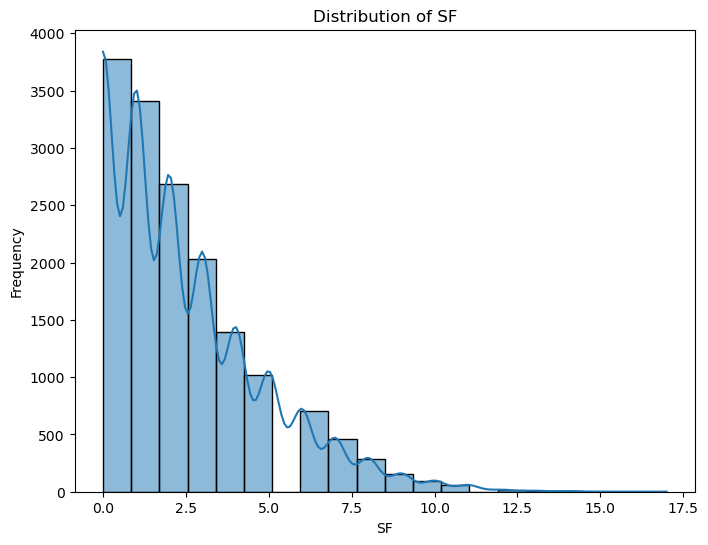

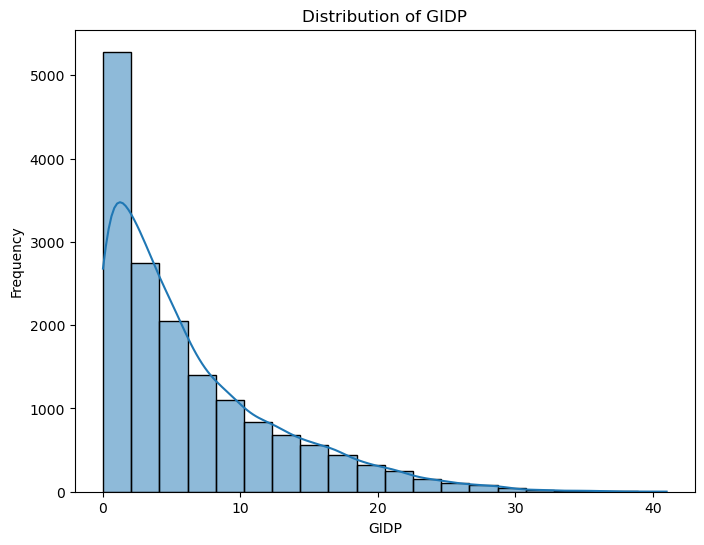

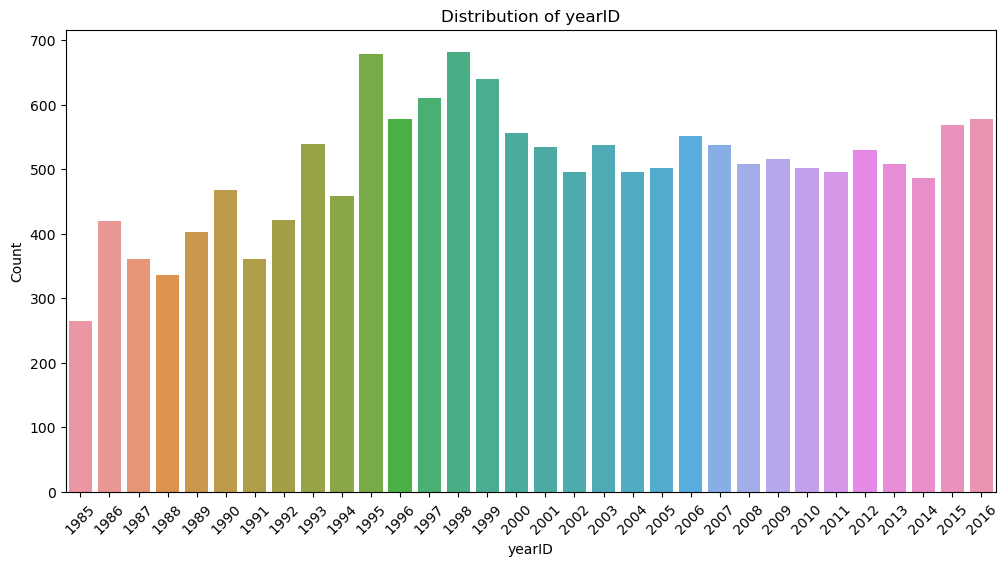

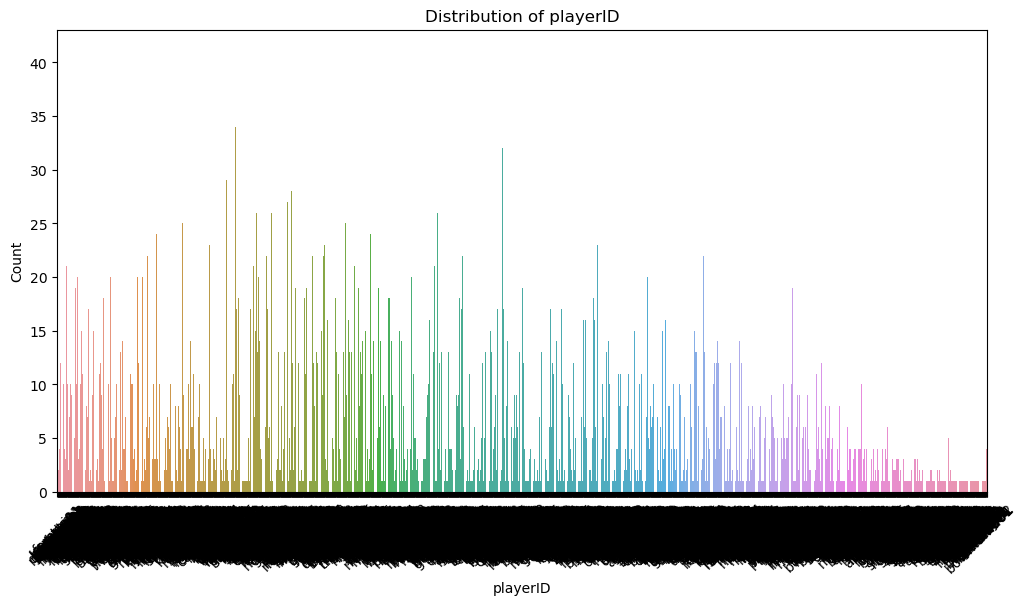

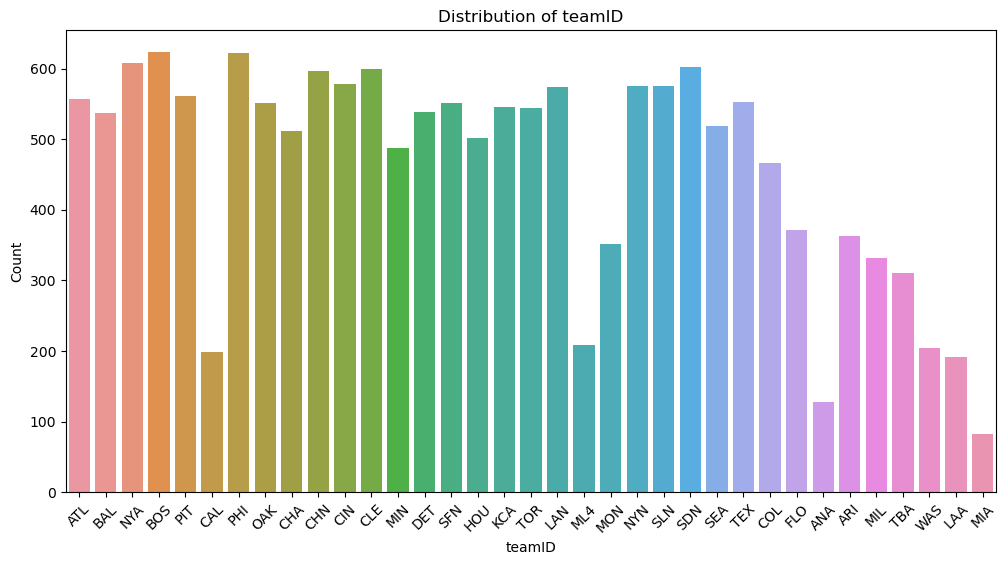

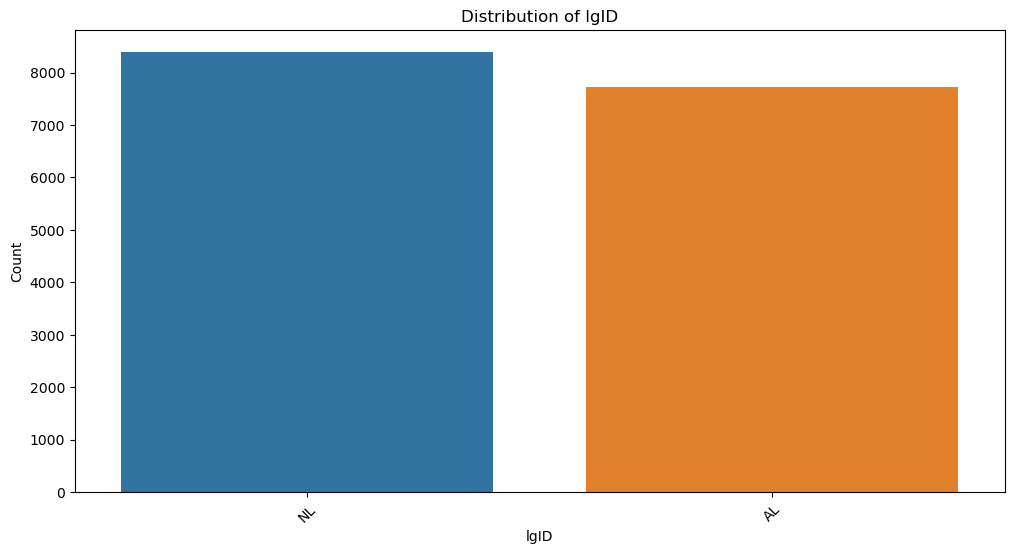

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['salary', 'ADJ Salary', 'InnOuts', 'PO', 'A', 'E', 'DP', 'W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 
                'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp', 'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 
                'R', 'SH', 'SF', 'GIDP']

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

categorical_cols = ['yearID', 'playerID', 'teamID', 'lgID']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [8]:
from sklearn.model_selection import train_test_split

features = ['W', 'L', 'CG', 'SHO', 'SV', 'IPouts', 'SO', 'BAOpp', 'ERA', 'GIDP']
X = data[features]
y = data['ADJ Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Multi-layer Perceptron Regression": MLPRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}\n")


Model: Linear Regression
Mean Squared Error: 11863197856597.15
R-squared: 0.11658051667850666

Model: Random Forest Regression
Mean Squared Error: 9424622863344.54
R-squared: 0.29817444157304374

Model: Support Vector Regression
Mean Squared Error: 15987472616177.88
R-squared: -0.1905428004259575

Model: Decision Tree Regression
Mean Squared Error: 19255586841226.605
R-squared: -0.43391021408859287

Model: Gradient Boosting Regression
Mean Squared Error: 11105720599124.232
R-squared: 0.17298774983043275

Model: Multi-layer Perceptron Regression
Mean Squared Error: 12927087044505.04
R-squared: 0.037355635828167255



/Users/willmarquart/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nBest Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  12.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   3.7s
[CV] END max_dep

In [11]:
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100),
    "Support Vector Regression": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Multi-layer Perceptron Regression": MLPRegressor()
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"Model: {name}")
    print(f"R-squared scores: {scores}")
    print(f"Mean R-squared: {np.mean(scores)}")
    print(f"Standard Deviation of R-squared: {np.std(scores)}\n")


Model: Linear Regression
R-squared scores: [-3.09882499 -0.08217211  0.13559413  0.03291496  0.01717553]
Mean R-squared: -0.5990624959982762
Standard Deviation of R-squared: 1.251786992881504

Model: Random Forest Regression
R-squared scores: [-3.43368783 -0.3228427   0.12028073  0.07410012  0.05815919]
Mean R-squared: -0.7007980994644166
Standard Deviation of R-squared: 1.375659145506314

Model: Support Vector Regression
R-squared scores: [-0.0223115  -0.03268326 -0.27295608 -0.36336786 -0.37043838]
Mean R-squared: -0.21235141622358755
Standard Deviation of R-squared: 0.15483293806365114

Model: Decision Tree Regression
R-squared scores: [-9.75811603 -2.87902118 -0.90000048 -0.70163113 -0.34795271]
Mean R-squared: -2.9173443079178827
Standard Deviation of R-squared: 3.532094577387616

Model: Gradient Boosting Regression
R-squared scores: [-2.38714936 -0.05851794  0.18185381  0.09208656  0.06132797]
Mean R-squared: -0.4220797933570391
Standard Deviation of R-squared: 0.9855416294568943

/Users/willmarquart/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/willmarquart/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/willmarquart/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/willmarquart/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Multi-layer Perceptron Regression
R-squared scores: [-2.91565437  0.03699961  0.05917968 -0.02799229 -0.07429919]
Mean R-squared: -0.5843533110457427
Standard Deviation of R-squared: 1.1666080376623746



/Users/willmarquart/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
from sklearn.ensemble import RandomForestRegressor

best_rf_model = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
best_rf_model.fit(X_train, y_train)

y_pred_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Model Evaluation:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")


Random Forest Regression Model Evaluation:
Mean Squared Error: 9398232088562.027
R-squared: 0.30013968946864855


In [14]:
from sklearn.ensemble import GradientBoostingRegressor

best_gb_model = GradientBoostingRegressor()
best_gb_model.fit(X_train, y_train)

y_pred_gb = best_gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regression Model Evaluation:")
print(f"Mean Squared Error: {mse_gb}")
print(f"R-squared: {r2_gb}")




Gradient Boosting Regression Model Evaluation:
Mean Squared Error: 11111607566581.523
R-squared: 0.17254936367078888
